In [1]:
import torch

In [2]:
#Criar um modelo de Rede Neural
class Net(torch.nn.Module):
  def __init__(self, input_size, hidden_size):
    super(Net, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.fc1 = torch.nn.Linear(self.input_size, self.hidden_size) #full connected
    self.relu = torch.nn.ReLU() #(0, infinito)
    self.fc2 = torch.nn.Linear(self.hidden_size, 1)
    self.sigmoid = torch.nn.Sigmoid() #(0, 1)
    # self.tanh = torch.nn.Tanh() # (-1, 1)
  def forward(self, x):
    hidden = self.fc1(x)
    relu = self.relu(hidden)
    output = self.fc2(relu)
    output = self.sigmoid(output)
    return output

In [3]:
#XOR
#entrada - saida
#1 0 - 1
#1 1 - 0
#0 1 - 1
#0 0 - 0

In [4]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()
dados = iris.data
classes = iris.target
nomes_classes = iris.target_names

In [6]:
# Dados da Iris
# São 150 instâncias (50 de cada flor)
# Converter 3 classes (setosa, virginica e versicolor) em apenas duas - ok
# Embaralhar os dados - ok
# Dividir em dois grupos: treinamento e testes (150 total, 120 treinar a rede, 30 para testar) - ok

In [7]:
# Converter as classes
import numpy as np
# saida = np.where(condição, true, false)
saida = np.where(classes==2, 0, classes)
# print(saida)

In [8]:
#Converter para tensor
entrada = torch.FloatTensor(dados) / 10
saida = torch.FloatTensor(saida)

In [9]:
# Embaralhar os dados
from sklearn.utils import shuffle
entrada, saida = shuffle(entrada, saida)

In [10]:
# Separar os dados em treinamento e testes
entrada_treinamento = entrada[0:120, :]
saida_treinamento = saida[0:120]
entrada_testes = entrada[120:150, :]
saida_testes = saida[120:150]
#print(entrada_testes)
#print(saida_testes)

In [11]:
#Montar o modelo para o treinamento
#print(entrada_treinamento.size())
input_size = entrada_treinamento.size()[1]
hidden_size = 5
modelo = Net(input_size, hidden_size)

In [12]:
#Treinar o modelo
#Definir um critério de parada
#1) Quantidade de épocas de treinamento
#2) Erro (taxa do erro)

epochs = 10000
# criterion = torch.nn.BCELoss() #Binary Cross Entropy
criterion = torch.nn.MSELoss()

optimizer = torch.optim.SGD(modelo.parameters(), lr = 0.9) 

errors = [] #criando um array vazio para guardar os erros de cada epoca

for epoch in range(epochs):
  optimizer.zero_grad()
  # Forward pass
  y_pred = modelo(entrada_treinamento)
  # Compute Loss
  loss = criterion(y_pred.squeeze(), saida_treinamento)
  errors.append(loss.item())
  if epoch % 1000 == 0:
    print('Epoch {}: train loss: {}'.format(epoch, loss.item()))
  # Backward pass
  loss.backward()
  optimizer.step()

Epoch 0: train loss: 0.298063188791275
Epoch 1000: train loss: 0.04505271092057228
Epoch 2000: train loss: 0.022359708324074745
Epoch 3000: train loss: 0.0192368496209383
Epoch 4000: train loss: 0.018060414120554924
Epoch 5000: train loss: 0.017436593770980835
Epoch 6000: train loss: 0.017044950276613235
Epoch 7000: train loss: 0.01677326112985611
Epoch 8000: train loss: 0.016571877524256706
Epoch 9000: train loss: 0.01641547493636608


In [13]:
# Rodar a rede com os dados de teste, os dados que a rede nunca viu
y_pred = modelo(entrada_testes)

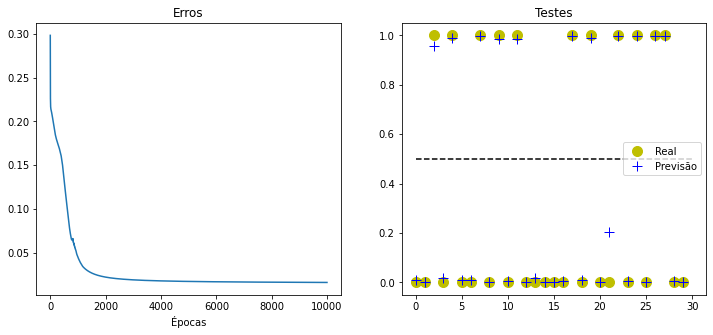

In [14]:
import matplotlib.pyplot as plt
import numpy as np
def plotcharts(errors):
    errors = np.array(errors)
    plt.figure(figsize=(12, 5))
    graf02 = plt.subplot(1, 2, 1) # nrows, ncols, index
    graf02.set_title('Erros')
    plt.plot(errors, '-')
    plt.xlabel('Épocas')

    graf03 = plt.subplot(1, 2, 2)
    plt.hlines(0.5, 0, 30, colors='k', linestyles='dashed')
    graf03.set_title('Testes')
    a = plt.plot(saida_testes.numpy(), 'yo', label='Real')
    plt.setp(a, markersize=10)
    a = plt.plot(y_pred.detach().numpy(), 'b+', label='Previsão')
    plt.setp(a, markersize=10)
    plt.legend(loc=7)
    plt.show()
    
plotcharts(errors)